# Import Neccesary Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Exploration Data

## Basic Exploration

In [2]:
europe = pd.read_csv('europe.csv')
europe.head()

,Unnamed: 0,country_name,Continent,region,local_name,capital,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,0,Austria,Europe,Western Europe,Österreich,Vienna,"83,879 km²","8,917,000",106.3,78.9,83.6,9.4,10.3
1,1,Belgium,Europe,Western Europe,België / Belgique,Brussels,"30,530 km²","11,544,000",378.1,78.6,83.1,9.9,11.0
2,2,France,Europe,Western Europe,France,Paris,"549,087 km²","67,380,000",122.7,79.2,85.3,10.9,9.9
3,3,Germany,Europe,Western Europe,Deutschland,Berlin,"357,580 km²","83,161,000",232.6,78.6,83.4,9.3,11.9
4,4,Liechtenstein,Europe,Western Europe,Liechtenstein,Vaduz,161 km²,"38,137",237.6,80.1,83.6,9.1,8.2


In [3]:
europe.drop(['Unnamed: 0', 'local_name', 'Continent'], axis = 1, inplace= True)

print(europe.shape), print(europe.columns)

(36, 10)
Index(['country_name', 'region', 'capital', 'area', 'population',
       'population_per_sq_km', 'male_life_expectancy',
       'female_life_expectancy', 'birth_rate', 'death_rate'],
      dtype='object')


(None, None)

In [4]:
print(europe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_name            36 non-null     object 
 1   region                  36 non-null     object 
 2   capital                 36 non-null     object 
 3   area                    36 non-null     object 
 4   population              36 non-null     object 
 5   population_per_sq_km    36 non-null     object 
 6   male_life_expectancy    36 non-null     float64
 7   female_life_expectancy  36 non-null     float64
 8   birth_rate              36 non-null     float64
 9   death_rate              36 non-null     float64
dtypes: float64(4), object(6)
memory usage: 2.9+ KB
None


In [5]:
print(europe.describe())

       male_life_expectancy  female_life_expectancy  birth_rate  death_rate
count             36.000000               36.000000   36.000000   36.000000
mean              75.944444               81.847222    9.619444   11.355556
std                4.722496                2.884291    1.109908    2.968833
min               66.400000               76.200000    7.100000    6.300000
25%               72.075000               79.850000    8.975000    9.475000
50%               78.300000               83.100000    9.650000   11.200000
75%               79.625000               84.125000   10.225000   12.700000
max               81.700000               85.300000   12.300000   18.000000


When i do describe method i realize that area not included in the results so i will change area to proper format.

In [6]:
europe.head(1)

,country_name,region,capital,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Western Europe,Vienna,"83,879 km²","8,917,000",106.3,78.9,83.6,9.4,10.3


In [7]:
import regex
total = europe[['area', 'population', 'population_per_sq_km']]

for data in total:
    europe[data] = europe[data].str.replace(r'\s\w+', '')
    europe[data] = europe[data].str.replace(r',', '').astype(float)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6116\1707960722.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  europe[data] = europe[data].str.replace(r'\s\w+', '')


In [8]:
europe.dtypes

country_name               object
region                     object
capital                    object
area                      float64
population                float64
population_per_sq_km      float64
male_life_expectancy      float64
female_life_expectancy    float64
birth_rate                float64
death_rate                float64
dtype: object

In [9]:
continent = europe.groupby(['region']).agg({'population':'sum', 'population_per_sq_km':'sum', 
                                             'male_life_expectancy': ['min', 'max', 'mean'], 
                                             'female_life_expectancy': ['min', 'max', 'mean'],
                                             'birth_rate': ['min', 'max', 'mean'],
                                             'death_rate': ['min', 'max', 'mean']})


In [10]:
continent

population population_per_sq_km male_life_expectancy        \
                         sum                  sum                  min   max   
region                                                                         
Eastern Europe   290237000.0              820.298                 66.4  75.3   
Northern Europe  105684463.0              641.348                 70.1  81.7   
Southern Europe   81336638.0             2219.890                 71.4  80.8   
Western Europe   197749556.0             1949.700                 78.6  81.1   

                         female_life_expectancy                birth_rate  \
                    mean                    min   max     mean        min   
region                                                                      
Eastern Europe   70.4000                   76.2  81.3  78.5800        7.8   
Northern Europe  77.7600                   80.0  85.0  83.2000        8.4   
Southern Europe  77.0875                   77.2  85.1  82.1500        7.1   
Western Europe   79.4625                   83.1  85.3  83.9375        9.1   

                               death_rate                 
                  max     mean        min   max     mean  
region                                                    
Eastern Europe   10.4   9.4100       10.8  18.0  13.8700  
Northern Europe  12.3  10.1300        6.3  15.6  10.2200  
Southern Europe  11.5   9.0625        7.9  16.9  11.3500  
Western Europe   10.9   9.8000        7.3  11.9   9.6375

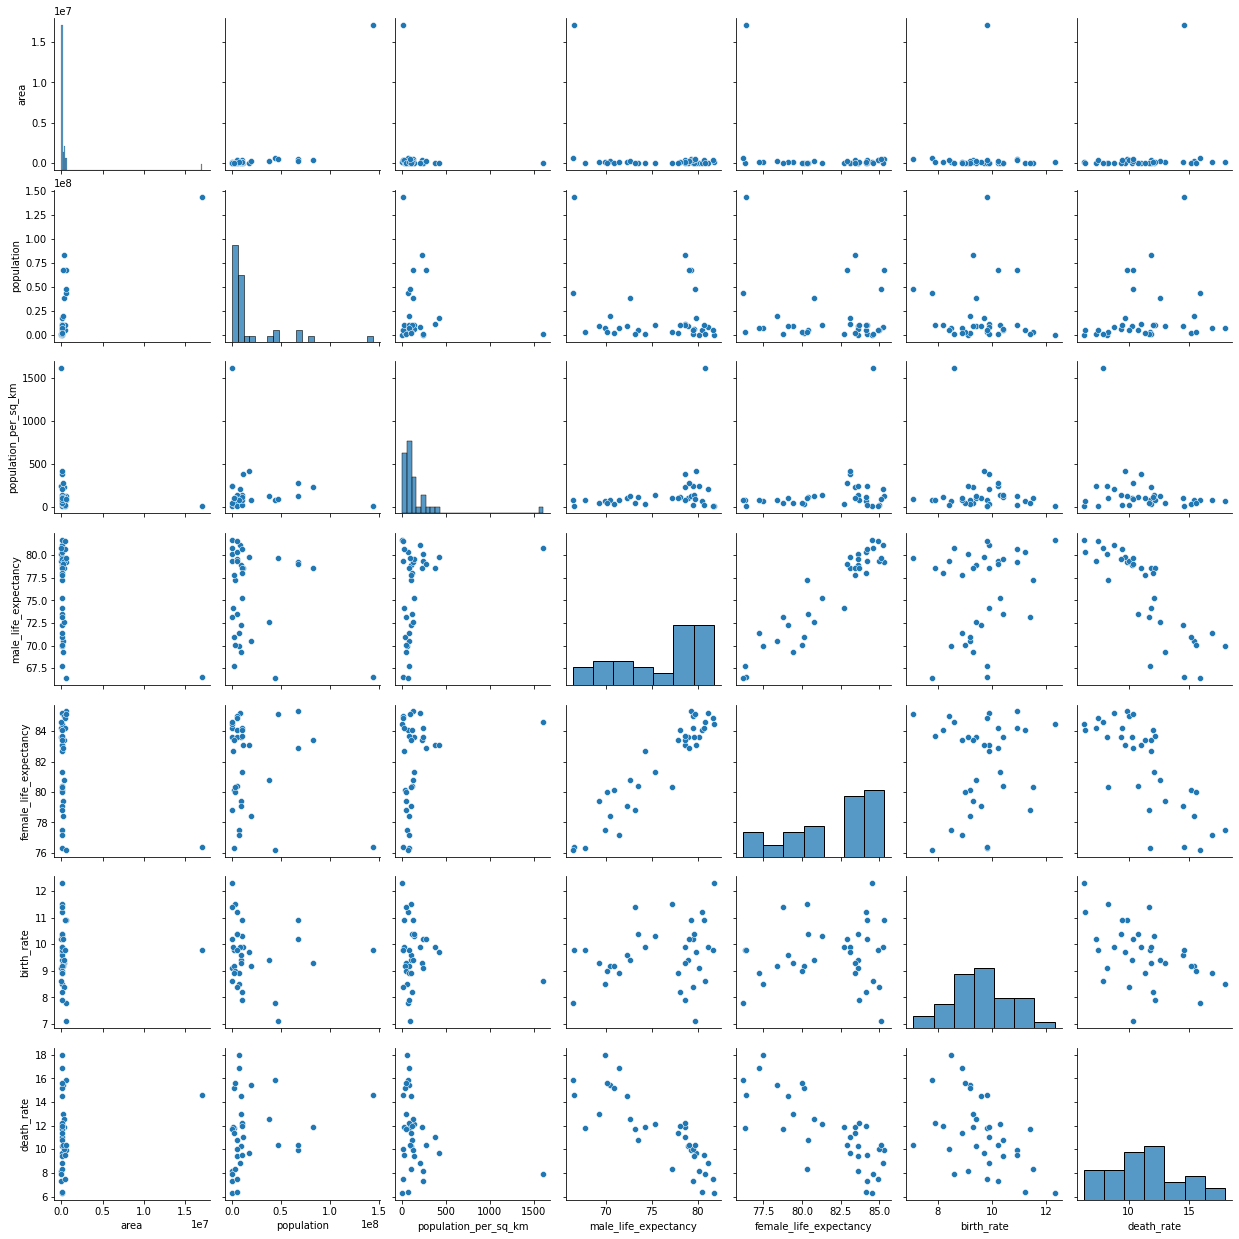

In [11]:
sns.pairplot(europe)

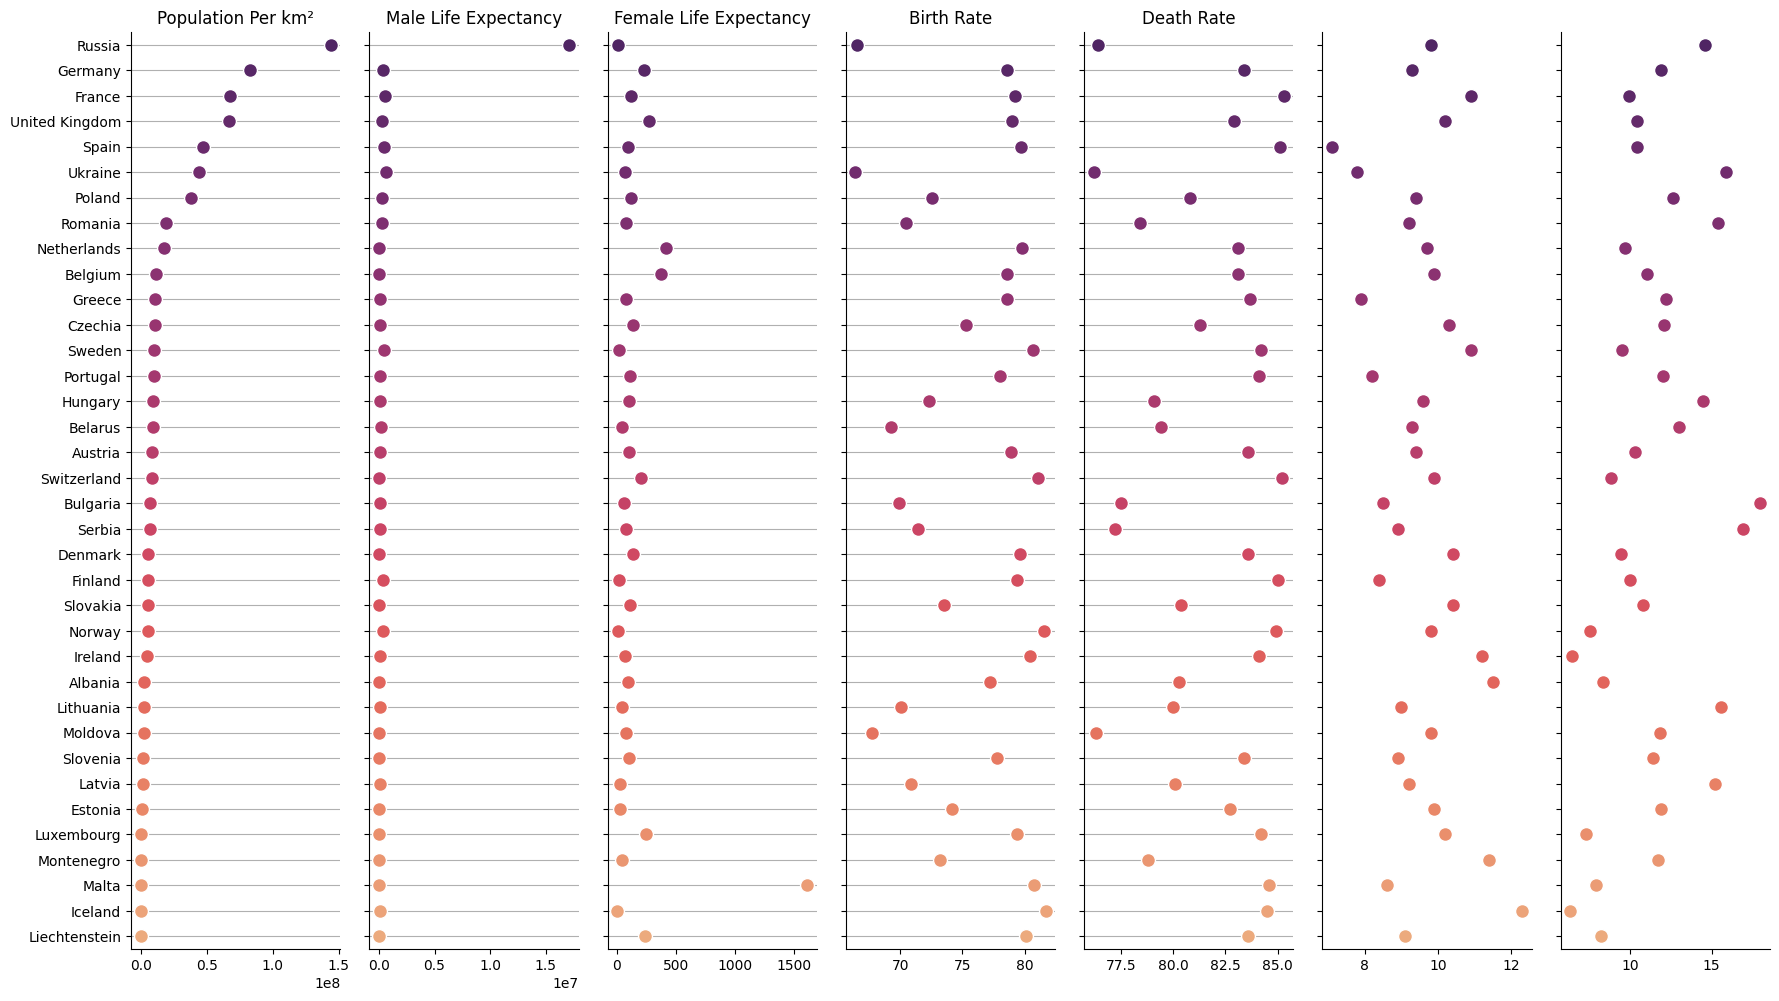

In [12]:
col = ["population", "area", "population_per_sq_km","male_life_expectancy","female_life_expectancy","birth_rate","death_rate"]
g = sns.PairGrid(europe.sort_values("population", ascending=False),
                 x_vars=col, y_vars=["country_name"],height=10, aspect=.25)
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlabel="", ylabel="")
titles = ["Population Per km²", "Male Life Expectancy",
          "Female Life Expectancy", "Birth Rate","Death Rate"]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
plt.show()


# Modeling

In [13]:
cluster_df = europe[["population", "area", "country_name","population","population_per_sq_km","male_life_expectancy",
                 "female_life_expectancy","birth_rate","death_rate"]]
cluster_df = cluster_df.set_index('country_name')


In [14]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [15]:
X = scale(cluster_df)

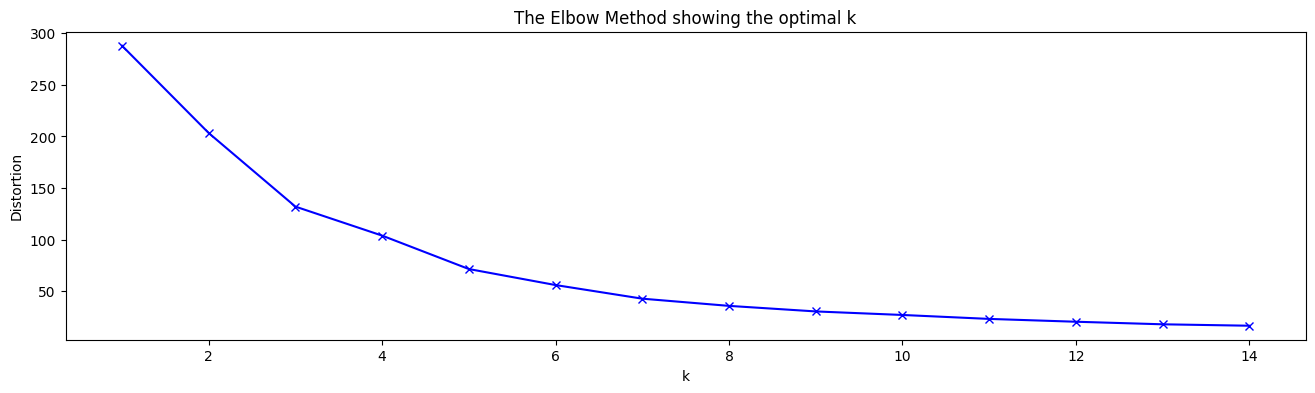

In [16]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
cluster = KMeans(n_clusters=9)
cluster.fit(X)
cluster_df["Cluster"] = cluster.labels_

In [31]:
cluster_df.reset_index()

,country_name,population,area,population,population_per_sq_km,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,Cluster
0,Austria,8917000.0,83879.0,8917000.0,106.300,78.9,83.6,9.4,10.3,0
1,Belgium,11544000.0,30530.0,11544000.0,378.100,78.6,83.1,9.9,11.0,0
2,France,67380000.0,549087.0,67380000.0,122.700,79.2,85.3,10.9,9.9,3
3,Germany,83161000.0,357580.0,83161000.0,232.600,78.6,83.4,9.3,11.9,3
4,Liechtenstein,38137.0,161.0,38137.0,237.600,80.1,83.6,9.1,8.2,0
5,Luxembourg,630419.0,2590.0,630419.0,243.400,79.4,84.2,10.2,7.3,0
6,Netherlands,17442000.0,41543.0,17442000.0,419.800,79.8,83.1,9.7,9.7,0
7,Switzerland,8637000.0,41290.0,8637000.0,209.200,81.1,85.2,9.9,8.8,0
8,Belarus,9380000.0,207600.0,9380000.0,45.180,69.3,79.4,9.3,13.0,1
9,Bulgaria,6934000.0,111000.0,6934000.0,62.470,69.9,77.5,8.5,18.0,1


In [32]:
cluster_df.to_csv('clustering_eda.csv')